<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"

df = pd.read_sql_query(QUERY, conn)

print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


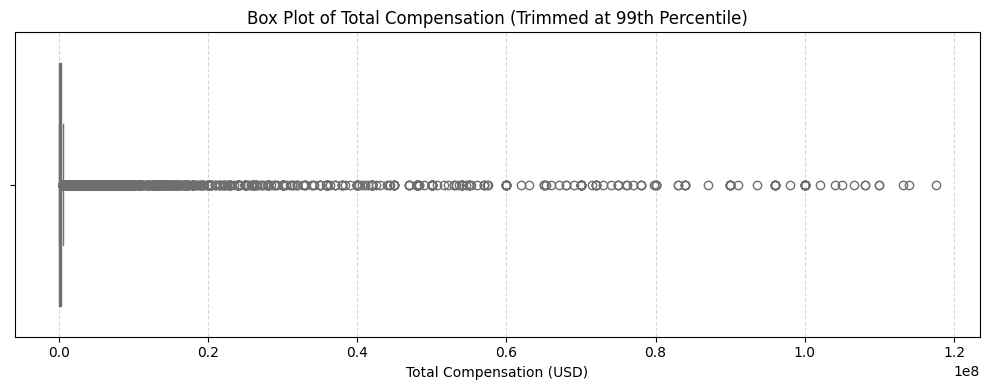

In [9]:
# your code goes here
QUERY = """
SELECT CompTotal
FROM main 
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

import seaborn as sns

# Step 1: Convert CompTotal to numeric (in case it's not)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Step 2: Drop missing values
df_comp = df.dropna(subset=['CompTotal'])

# Step 3: Optionally trim top 1% to reduce visual distortion from extreme outliers
df_comp_trimmed = df_comp[df_comp['CompTotal'] < df_comp['CompTotal'].quantile(0.99)]

# Step 4: Plot boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_comp_trimmed['CompTotal'], color='skyblue')

plt.title('Box Plot of Total Compensation (Trimmed at 99th Percentile)')
plt.xlabel('Total Compensation (USD)')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


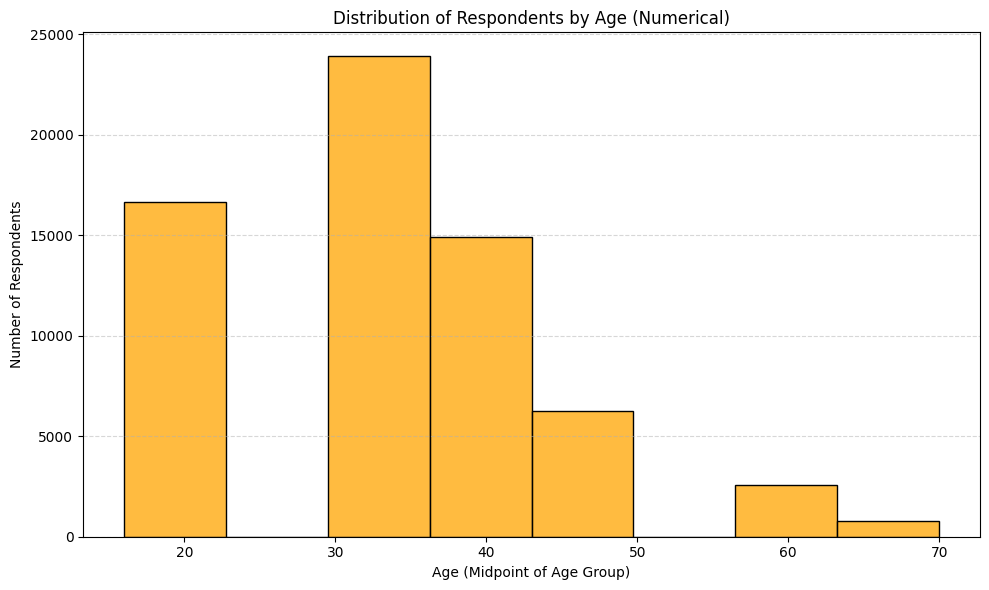

In [10]:
# your code goes here
QUERY = """
SELECT Age 
FROM main 
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
import numpy as np

# Step 1: Define mapping from categorical ranges to numeric midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}

# Step 2: Apply mapping
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 3: Drop missing values for AgeNumeric
df_age = df.dropna(subset=['AgeNumeric'])

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_age, x='AgeNumeric', bins=8, color='orange', edgecolor='black')

plt.title('Distribution of Respondents by Age (Numerical)')
plt.xlabel('Age (Midpoint of Age Group)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17320\1816092659.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_agecomp, x='Age', y='CompTotal', order=age_order, palette='Set2')


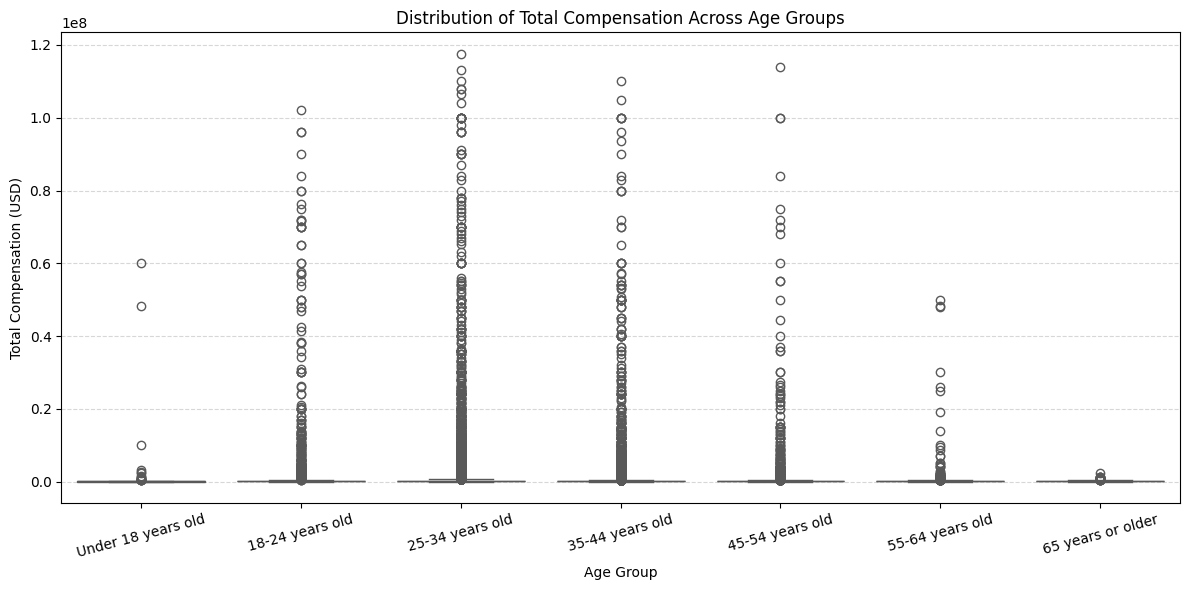

In [11]:
# your code goes here
QUERY = """SELECT Age, CompTotal 
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)


# Step 1: Convert CompTotal to numeric (if not already)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Step 2: Drop missing values
df_agecomp = df.dropna(subset=['CompTotal', 'Age'])

# Step 3: Remove top 1% outliers to improve readability
df_agecomp = df_agecomp[df_agecomp['CompTotal'] < df_agecomp['CompTotal'].quantile(0.99)]

# Step 4: Define custom order for age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Step 5: Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_agecomp, x='Age', y='CompTotal', order=age_order, palette='Set2')

plt.title('Distribution of Total Compensation Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17320\4011760310.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


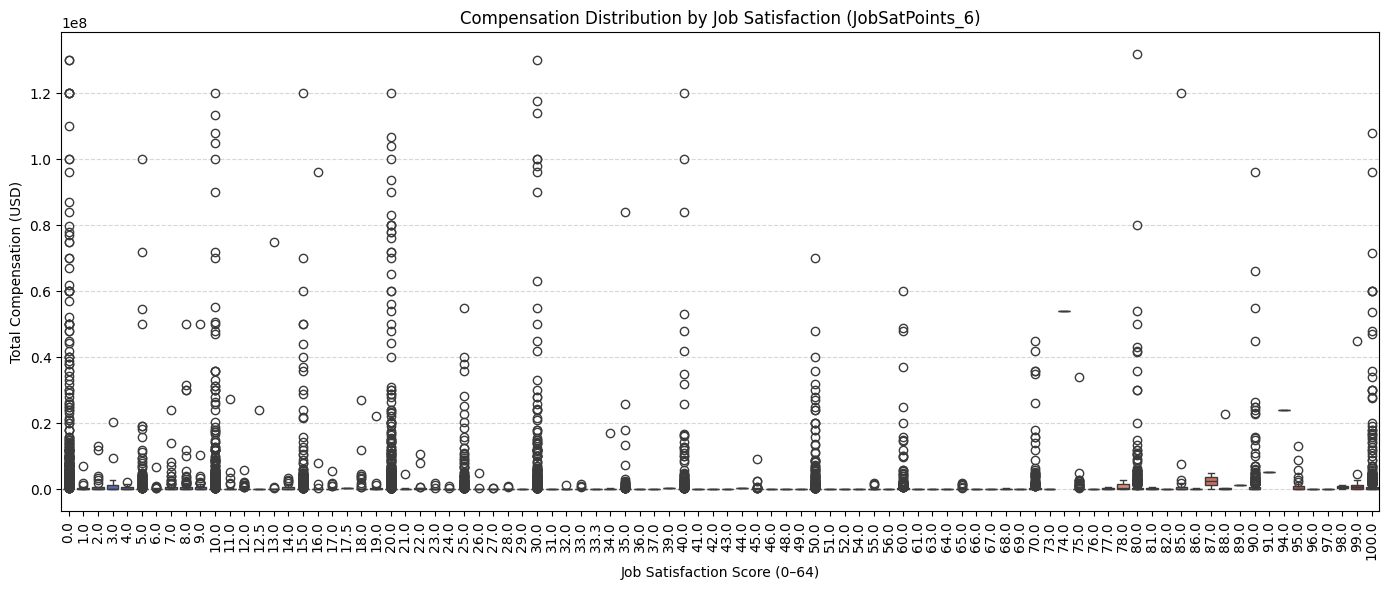

In [13]:
# your code goes here
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 1: Ensure numeric types
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 2: Drop missing values
df_clean = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Step 3: Remove top 1% outliers in compensation for clarity
df_clean = df_clean[df_clean['CompTotal'] < df_clean['CompTotal'].quantile(0.99)]

# Step 4: Sort by satisfaction points
sorted_satisfaction = sorted(df_clean['JobSatPoints_6'].unique())

# Step 5: Plot box plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_clean,
    x='JobSatPoints_6',
    y='CompTotal',
    order=sorted_satisfaction,
    palette='coolwarm'
)

plt.title('Compensation Distribution by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Job Satisfaction Score (0–64)')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17320\2836777382.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='DevTypeList', y='ConvertedCompYearly', palette='Set3')


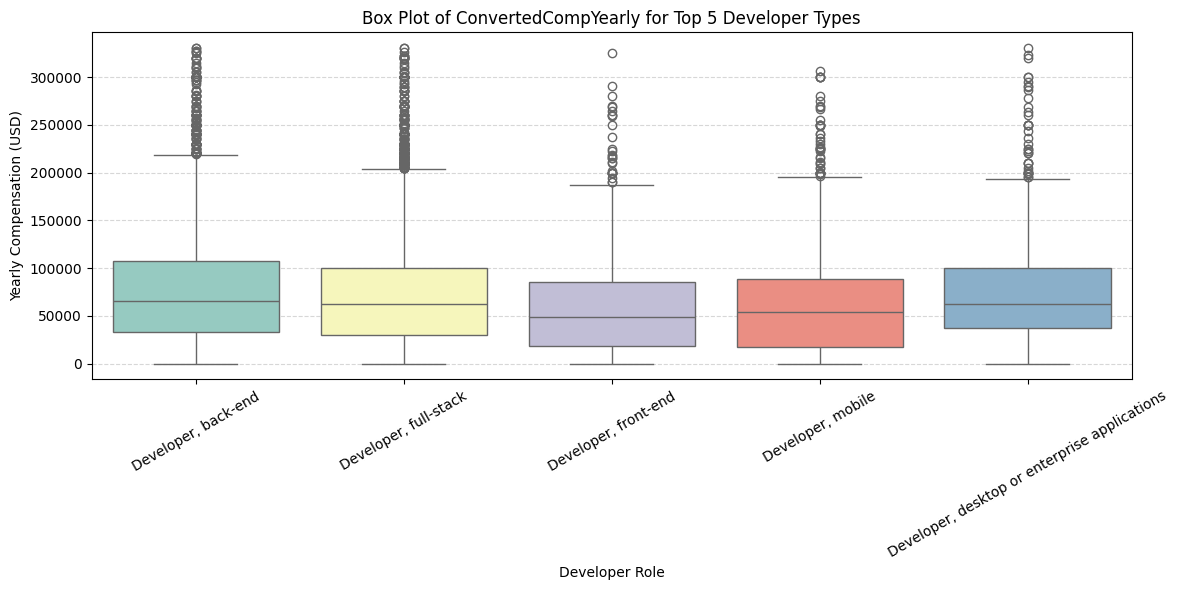

In [16]:
# your code goes here
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

# Step 1: Clean and prepare
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['DevType'] = df['DevType'].astype(str)

# Step 2: Drop missing values
df_dev = df.dropna(subset=['ConvertedCompYearly', 'DevType'])

# Step 3: Split DevType values and flatten
df_dev['DevTypeList'] = df_dev['DevType'].str.split(';')
df_exploded = df_dev.explode('DevTypeList')
df_exploded['DevTypeList'] = df_exploded['DevTypeList'].str.strip()

# Step 4: Get top 5 most common developer types
top5_roles = df_exploded['DevTypeList'].value_counts().head(5).index.tolist()

# Step 5: Filter for top 5 roles only
df_top5 = df_exploded[df_exploded['DevTypeList'].isin(top5_roles)]

# Step 6: Remove top 1% compensation outliers for better plot visibility
df_top5 = df_top5[df_top5['ConvertedCompYearly'] < df_top5['ConvertedCompYearly'].quantile(0.99)]

# Step 7: Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='DevTypeList', y='ConvertedCompYearly', palette='Set3')

plt.title('Box Plot of ConvertedCompYearly for Top 5 Developer Types')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17320\2762276211.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cty, x='Country', y='CompTotal', palette='pastel')


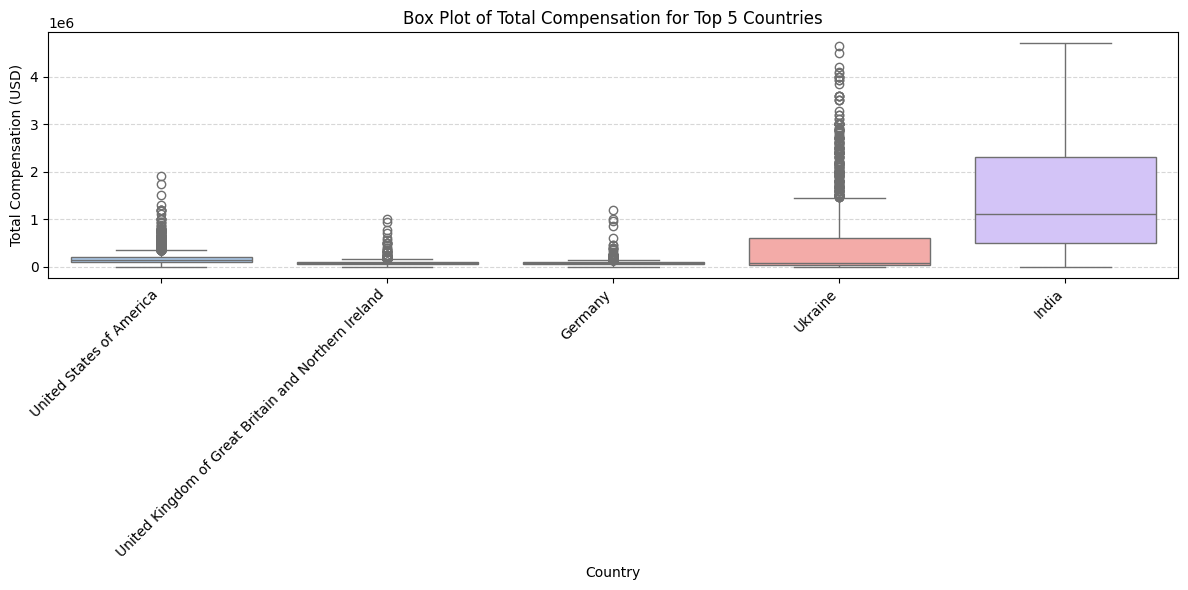

In [19]:
# your code goes here
QUERY = """
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

# Step 1: Ensure compensation is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Step 2: Drop missing values
df_cty = df.dropna(subset=['Country', 'CompTotal'])

# Step 3: Identify top 5 countries by respondent count
top_countries = df_cty['Country'].value_counts().head(5).index.tolist()

# Step 4: Filter data for top 5 countries
df_cty = df_cty[df_cty['Country'].isin(top_countries)]

# Step 5: Remove top 1% outliers for readability
df_cty = df_cty[df_cty['CompTotal'] < df_cty['CompTotal'].quantile(0.99)]

# Step 6: Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cty, x='Country', y='CompTotal', palette='pastel')

plt.title('Box Plot of Total Compensation for Top 5 Countries')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17320\1684261745.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_emp_all, x='CompTotal', y='Employment', order=employment_order, palette='Spectral')


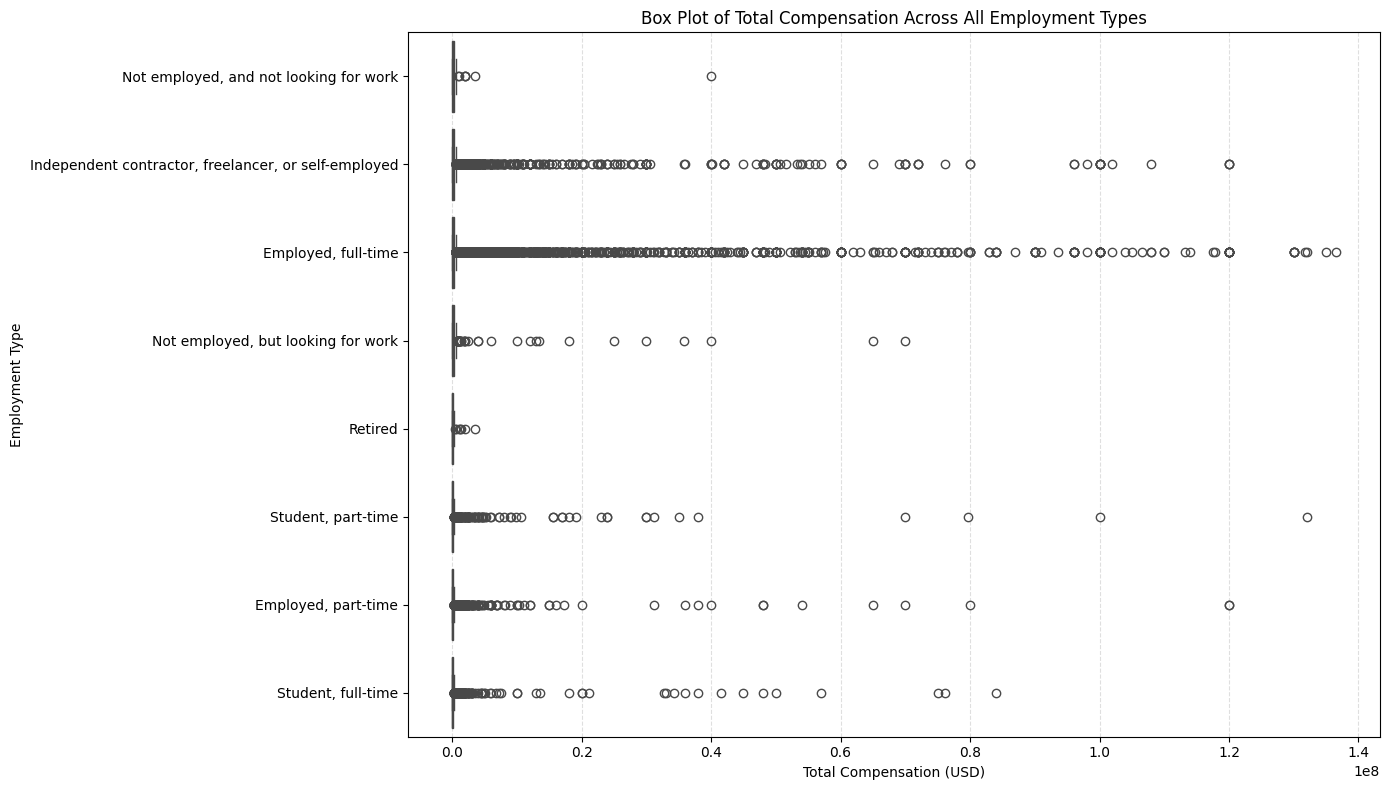

In [21]:
# your code goes here
QUERY = """
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 1: Convert 'CompTotal' to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Step 2: Drop rows with missing compensation or employment
df_emp_all = df.dropna(subset=['CompTotal', 'Employment'])

# Step 3: Split multi-response 'Employment' values and explode into rows
df_emp_all['Employment'] = df_emp_all['Employment'].str.split(';')
df_emp_all = df_emp_all.explode('Employment')
df_emp_all['Employment'] = df_emp_all['Employment'].str.strip()

# Step 4: Remove top 1% compensation outliers
df_emp_all = df_emp_all[df_emp_all['CompTotal'] < df_emp_all['CompTotal'].quantile(0.99)]

# Optional: Sort employment types by median compensation
employment_order = df_emp_all.groupby('Employment')['CompTotal'].median().sort_values(ascending=False).index

# Step 5: Plot boxplot for all unique employment types
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_emp_all, x='CompTotal', y='Employment', order=employment_order, palette='Spectral')

plt.title('Box Plot of Total Compensation Across All Employment Types')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Employment Type')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17320\1365491105.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


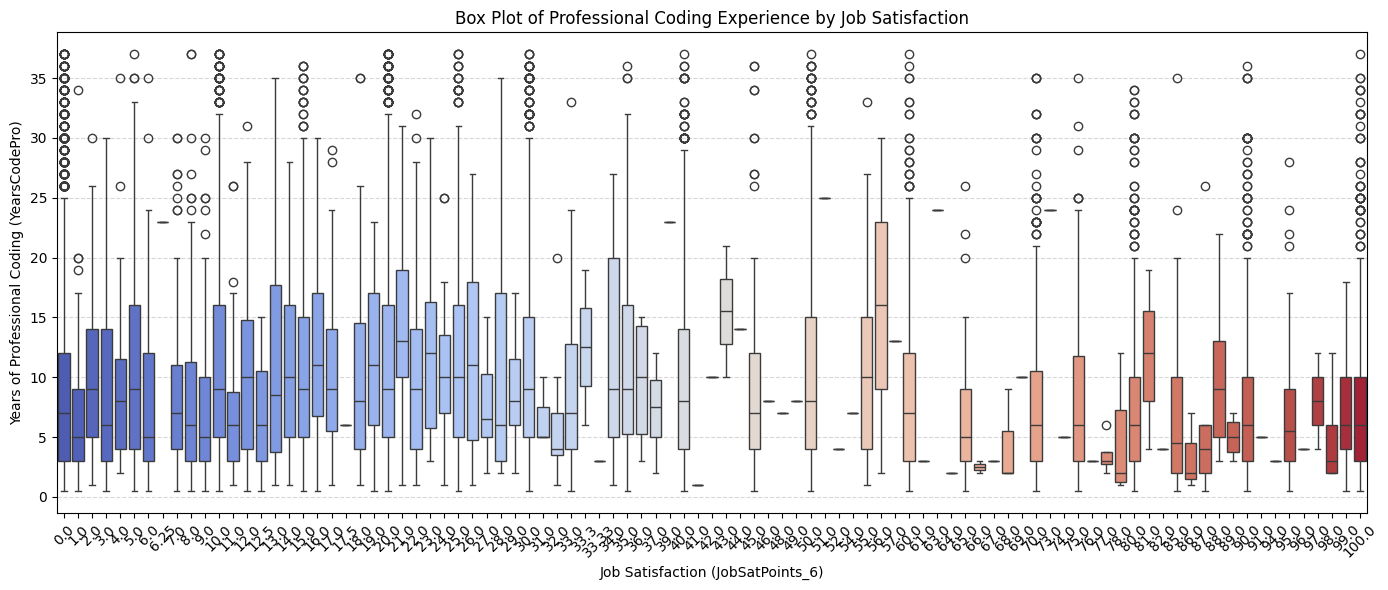

In [22]:
# your code goes here
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 1: Convert YearsCodePro to numeric
def convert_years(value):
    if isinstance(value, str):
        if 'Less than' in value:
            return 0.5
        elif 'More than' in value:
            return 51  # assuming >50
    try:
        return float(value)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)

# Step 2: Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 3: Drop missing values
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Optional: Remove outliers in YearsCodePro
df_clean = df_clean[df_clean['YearsCodePro'] < df_clean['YearsCodePro'].quantile(0.99)]

# Step 4: Plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_clean,
    x='JobSatPoints_6',
    y='YearsCodePro',
    palette='coolwarm'
)

plt.title('Box Plot of Professional Coding Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding (YearsCodePro)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [23]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
